In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Part 0:Reading the data
data= pd.read_csv(r'C:\Users\hp\OneDrive\Desktop\ML\unemployment_analysis.csv')

In [3]:
df = pd.DataFrame(data)

In [4]:
df_pivot = pd.DataFrame()
df_pivot['Country_Name'] = df.pop('Country Name')

In [5]:
df_pivot['Country_Code'] = df.pop('Country Code')

In [6]:
#The unique country names along with their country codes
df_pivot

,Country_Name,Country_Code
0,Africa Eastern and Southern,AFE
1,Afghanistan,AFG
2,Africa Western and Central,AFW
3,Angola,AGO
4,Albania,ALB
...,...,...
230,Samoa,WSM
231,"Yemen, Rep.",YEM
232,South Africa,ZAF
233,Zambia,ZMB


In [7]:
# custom function to convert "lacs" to numeric value
def convert_lacs_to_numeric(value):
    if isinstance(value, str) and "lacs" in value:
        return float(value.split()[0])
    return value


In [8]:
 #apply the function to the entire dataframe using applymap
df = df.applymap(convert_lacs_to_numeric)

In [9]:
df

,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,7.80,7.84,7.85,7.84,7.83,7.84,7.86,7.81,7.79,7.72,...,6.56,6.45,6.41,6.49,6.61,6.71,6.73,6.91,7.56,8.11
1,10.65,10.82,10.72,10.73,11.18,10.96,10.78,10.80,10.81,10.81,...,11.34,11.19,11.14,11.13,11.16,11.18,11.15,11.22,11.71,13.28
2,4.42,4.53,4.55,4.54,4.53,4.57,4.60,4.66,4.86,4.92,...,4.64,4.41,4.69,4.63,5.57,6.02,6.04,6.06,6.77,6.84
3,4.21,4.21,4.23,4.16,4.11,4.10,4.09,4.07,4.05,4.03,...,7.35,7.37,7.37,7.39,7.41,7.41,7.42,7.42,8.33,8.53
4,10.31,30.01,25.26,20.84,14.61,13.93,16.88,20.05,20.84,19.03,...,13.38,15.87,18.05,17.19,15.42,13.62,12.30,11.47,13.33,11.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,2.10,2.38,2.63,3.04,3.19,3.47,3.90,4.18,4.48,4.66,...,8.75,8.67,8.72,8.50,8.31,8.58,8.69,8.41,9.15,9.84
231,8.32,8.31,8.35,8.34,8.96,9.59,10.20,10.81,11.46,11.56,...,13.17,13.27,13.47,13.77,13.43,13.30,13.15,13.06,13.39,13.57
232,29.95,29.98,29.92,29.89,29.89,29.87,29.91,29.95,29.91,29.88,...,24.73,24.56,24.89,25.15,26.54,27.04,26.91,28.47,29.22,33.56
233,18.90,19.37,19.70,18.43,16.81,15.30,13.64,12.00,12.44,12.93,...,7.85,8.61,9.36,10.13,10.87,11.63,12.01,12.52,12.85,13.03


In [10]:
#Finding the total number of unemployed people in each country
row_sum = df.sum(axis=1)
df = df.assign(Sum=row_sum)

In [11]:
df

,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Sum
0,7.80,7.84,7.85,7.84,7.83,7.84,7.86,7.81,7.79,7.72,...,6.45,6.41,6.49,6.61,6.71,6.73,6.91,7.56,8.11,224.57
1,10.65,10.82,10.72,10.73,11.18,10.96,10.78,10.80,10.81,10.81,...,11.19,11.14,11.13,11.16,11.18,11.15,11.22,11.71,13.28,345.38
2,4.42,4.53,4.55,4.54,4.53,4.57,4.60,4.66,4.86,4.92,...,4.41,4.69,4.63,5.57,6.02,6.04,6.06,6.77,6.84,153.27
3,4.21,4.21,4.23,4.16,4.11,4.10,4.09,4.07,4.05,4.03,...,7.37,7.37,7.39,7.41,7.41,7.42,7.42,8.33,8.53,169.02
4,10.31,30.01,25.26,20.84,14.61,13.93,16.88,20.05,20.84,19.03,...,15.87,18.05,17.19,15.42,13.62,12.30,11.47,13.33,11.82,505.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,2.10,2.38,2.63,3.04,3.19,3.47,3.90,4.18,4.48,4.66,...,8.67,8.72,8.50,8.31,8.58,8.69,8.41,9.15,9.84,180.98
231,8.32,8.31,8.35,8.34,8.96,9.59,10.20,10.81,11.46,11.56,...,13.27,13.47,13.77,13.43,13.30,13.15,13.06,13.39,13.57,365.60
232,29.95,29.98,29.92,29.89,29.89,29.87,29.91,29.95,29.91,29.88,...,24.56,24.89,25.15,26.54,27.04,26.91,28.47,29.22,33.56,875.21
233,18.90,19.37,19.70,18.43,16.81,15.30,13.64,12.00,12.44,12.93,...,8.61,9.36,10.13,10.87,11.63,12.01,12.52,12.85,13.03,407.96


In [12]:
df = pd.concat([df_pivot, df], axis=1)

In [13]:
df

,Country_Name,Country_Code,1991,1992,1993,1994,1995,1996,1997,1998,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Sum
0,Africa Eastern and Southern,AFE,7.80,7.84,7.85,7.84,7.83,7.84,7.86,7.81,...,6.45,6.41,6.49,6.61,6.71,6.73,6.91,7.56,8.11,224.57
1,Afghanistan,AFG,10.65,10.82,10.72,10.73,11.18,10.96,10.78,10.80,...,11.19,11.14,11.13,11.16,11.18,11.15,11.22,11.71,13.28,345.38
2,Africa Western and Central,AFW,4.42,4.53,4.55,4.54,4.53,4.57,4.60,4.66,...,4.41,4.69,4.63,5.57,6.02,6.04,6.06,6.77,6.84,153.27
3,Angola,AGO,4.21,4.21,4.23,4.16,4.11,4.10,4.09,4.07,...,7.37,7.37,7.39,7.41,7.41,7.42,7.42,8.33,8.53,169.02
4,Albania,ALB,10.31,30.01,25.26,20.84,14.61,13.93,16.88,20.05,...,15.87,18.05,17.19,15.42,13.62,12.30,11.47,13.33,11.82,505.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,Samoa,WSM,2.10,2.38,2.63,3.04,3.19,3.47,3.90,4.18,...,8.67,8.72,8.50,8.31,8.58,8.69,8.41,9.15,9.84,180.98
231,"Yemen, Rep.",YEM,8.32,8.31,8.35,8.34,8.96,9.59,10.20,10.81,...,13.27,13.47,13.77,13.43,13.30,13.15,13.06,13.39,13.57,365.60
232,South Africa,ZAF,29.95,29.98,29.92,29.89,29.89,29.87,29.91,29.95,...,24.56,24.89,25.15,26.54,27.04,26.91,28.47,29.22,33.56,875.21
233,Zambia,ZMB,18.90,19.37,19.70,18.43,16.81,15.30,13.64,12.00,...,8.61,9.36,10.13,10.87,11.63,12.01,12.52,12.85,13.03,407.96


In [14]:
df = df.drop('Sum', axis=1)

In [15]:
df_new = pd.DataFrame(df)

In [16]:
#Displaying data type of each column
#Also shows number if null values .Column 2000 and 2015 have null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 33 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country_Name  235 non-null    object 
 1   Country_Code  235 non-null    object 
 2   1991          235 non-null    float64
 3   1992          235 non-null    float64
 4   1993          235 non-null    float64
 5   1994          235 non-null    float64
 6   1995          235 non-null    float64
 7   1996          235 non-null    float64
 8   1997          235 non-null    float64
 9   1998          235 non-null    float64
 10  1999          235 non-null    float64
 11  2000          234 non-null    float64
 12  2001          235 non-null    float64
 13  2002          235 non-null    float64
 14  2003          235 non-null    float64
 15  2004          235 non-null    float64
 16  2005          235 non-null    float64
 17  2006          235 non-null    float64
 18  2007          235 non-null    

In [17]:
#Part 1:Data cleaning
#The data cleaning function displays the row containing the null value.
def datacleaning(year):
    bool_series = pd.isnull(df[year])
    # filtering data 
    print(data[bool_series]) 
    

In [18]:
datacleaning("2000")

          1991       1992       1993       1994       1995       1996  \
228  1.68 lacs  1.69 lacs  1.73 lacs  1.59 lacs  1.74 lacs  1.72 lacs   

          1997       1998       1999 2000  ...       2012       2013  \
228  1.68 lacs  1.76 lacs  1.78 lacs  NaN  ...  1.85 lacs  1.86 lacs   

          2014       2015       2016       2017       2018      2019  \
228  1.81 lacs  1.86 lacs  1.78 lacs  1.75 lacs  1.81 lacs  1.8 lacs   

          2020       2021  
228  2.12 lacs  2.18 lacs  

[1 rows x 31 columns]


In [19]:
datacleaning("2015")

          1991       1992       1993     1994       1995       1996     1997  \
136  24.5 lacs  26.3 lacs  27.7 lacs  30 lacs  35.6 lacs  38.8 lacs  36 lacs   

          1998       1999       2000  ...        2012     2013        2014  \
136  34.5 lacs  32.4 lacs  32.2 lacs  ...  31.02 lacs  29 lacs  28.03 lacs   

    2015        2016        2017        2018        2019       2020       2021  
136  NaN  23.72 lacs  22.38 lacs  20.74 lacs  17.26 lacs  17.2 lacs  16.2 lacs  

[1 rows x 31 columns]


In [20]:
#Fillinf the null values with the mean of the row
df = df.fillna(df.mean(axis=1), axis=0)

In [21]:
#Finding the outliers using Tukey's fences method
df = df.set_index('Country_Name')
# specify country for which outliers need to be found
country = 'Benin'

# select row for the specified country and remove country name column
row_data = df.loc[country].iloc[1:]

# calculate the mean of the row
row_mean = row_data.median()

# calculate the Tukey's fences for the row
q1 = row_data.quantile(0.25)
q3 = row_data.quantile(0.75)
iqr = q3 - q1
fence_low = q1 - 1.5 * iqr
fence_high = q3 + 1.5 * iqr

# identify the values in the row that are outside the fences
outliers_mask = (row_data < fence_low) | (row_data > fence_high)

# replace the outlier values with the mean of the row
row_data[outliers_mask] = row_mean

print(row_data)


1991        1.49
1992        1.51
1993        1.41
1994        1.36
1995        1.25
1996        1.18
1997         1.1
1998        1.02
1999        0.94
2000        0.85
2001        0.77
2002        0.69
2003        0.74
2004        0.77
2005    0.000008
2006        0.86
2007        0.89
2008        0.94
2009         1.0
2010        1.04
2011        1.25
2012        2.47
2013        2.29
2014        2.13
2015        2.01
2016        1.83
2017        1.64
2018        1.47
2019        1.47
2020        1.58
2021        1.57
Name: Benin, dtype: object


In [22]:
df = df.reset_index()

In [23]:
# set country name as index
df = df.set_index('Country_Name')


# specify country for which outliers need to be found
country = 'Bahrain'

# select row for the specified country and remove country name column
row_data = df.loc[country].iloc[1:]

# define a function to calculate outliers using Tukey's method
def detect_outliers_Tukey(data):
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    outlier_min = q1 - 1.5 * iqr
    outlier_max = q3 + 1.5 * iqr
    outliers = [x for x in data if x < outlier_min or x > outlier_max]
    return outliers

# find outliers using Tukey's method
outliers = detect_outliers_Tukey(row_data)

print(outliers)
df = df.reset_index()


[111.2, 0.00011, 1.78, 1.87]


In [24]:
df = df.set_index('Country_Name')
# specify country for which outliers need to be found
country = 'Bahrain'

# select row for the specified country and remove country name column
row_data = df.loc[country].iloc[1:]

# calculate the mean of the row
row_mean = row_data.median()

# calculate the Tukey's fences for the row
q1 = row_data.quantile(0.25)
q3 = row_data.quantile(0.75)
iqr = q3 - q1
fence_low = q1 - 1.5 * iqr
fence_high = q3 + 1.5 * iqr

# identify the values in the row that are outside the fences
outliers_mask = (row_data < fence_low) | (row_data > fence_high)

# replace the outlier values with the mean of the row
row_data[outliers_mask] = row_mean

print(row_data)



1991    1.01
1992    1.05
1993    1.01
1994    1.11
1995    1.08
1996    1.08
1997    1.09
1998    1.08
1999    1.09
2000    1.08
2001    1.11
2002    1.11
2003    1.09
2004    1.09
2005    1.09
2006    1.11
2007    1.09
2008    1.11
2009    1.14
2010    1.13
2011    1.18
2012     1.2
2013    1.18
2014    1.19
2015     1.2
2016    1.19
2017    1.18
2018     1.2
2019     1.2
2020    1.11
2021    1.11
Name: Bahrain, dtype: object


In [25]:
df = df.reset_index()

In [26]:
df

,Country_Name,Country_Code,1991,1992,1993,1994,1995,1996,1997,1998,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Africa Eastern and Southern,AFE,7.80,7.84,7.85,7.84,7.83,7.84,7.86,7.81,...,6.56,6.45,6.41,6.49,6.61,6.71,6.73,6.91,7.56,8.11
1,Afghanistan,AFG,10.65,10.82,10.72,10.73,11.18,10.96,10.78,10.80,...,11.34,11.19,11.14,11.13,11.16,11.18,11.15,11.22,11.71,13.28
2,Africa Western and Central,AFW,4.42,4.53,4.55,4.54,4.53,4.57,4.60,4.66,...,4.64,4.41,4.69,4.63,5.57,6.02,6.04,6.06,6.77,6.84
3,Angola,AGO,4.21,4.21,4.23,4.16,4.11,4.10,4.09,4.07,...,7.35,7.37,7.37,7.39,7.41,7.41,7.42,7.42,8.33,8.53
4,Albania,ALB,10.31,30.01,25.26,20.84,14.61,13.93,16.88,20.05,...,13.38,15.87,18.05,17.19,15.42,13.62,12.30,11.47,13.33,11.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,Samoa,WSM,2.10,2.38,2.63,3.04,3.19,3.47,3.90,4.18,...,8.75,8.67,8.72,8.50,8.31,8.58,8.69,8.41,9.15,9.84
231,"Yemen, Rep.",YEM,8.32,8.31,8.35,8.34,8.96,9.59,10.20,10.81,...,13.17,13.27,13.47,13.77,13.43,13.30,13.15,13.06,13.39,13.57
232,South Africa,ZAF,29.95,29.98,29.92,29.89,29.89,29.87,29.91,29.95,...,24.73,24.56,24.89,25.15,26.54,27.04,26.91,28.47,29.22,33.56
233,Zambia,ZMB,18.90,19.37,19.70,18.43,16.81,15.30,13.64,12.00,...,7.85,8.61,9.36,10.13,10.87,11.63,12.01,12.52,12.85,13.03


In [27]:
#Creating a new dataframe with year and no. of unemployed column
melted_df = pd.melt(df, id_vars=['Country_Name', 'Country_Code'], var_name='Year', value_name='No. of unemployed')

# Sort the dataframe by country and year
melted_df = melted_df.sort_values(['Country_Name', 'Year'])

# Reset the index of the dataframe
melted_df = melted_df.reset_index(drop=True)

In [28]:
melted_df

,Country_Name,Country_Code,Year,No. of unemployed
0,Afghanistan,AFG,1991,10.65
1,Afghanistan,AFG,1992,10.82
2,Afghanistan,AFG,1993,10.72
3,Afghanistan,AFG,1994,10.73
4,Afghanistan,AFG,1995,11.18
...,...,...,...,...
7280,Zimbabwe,ZWE,2017,4.78
7281,Zimbabwe,ZWE,2018,4.80
7282,Zimbabwe,ZWE,2019,4.83
7283,Zimbabwe,ZWE,2020,5.35


In [29]:
df

,Country_Name,Country_Code,1991,1992,1993,1994,1995,1996,1997,1998,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Africa Eastern and Southern,AFE,7.80,7.84,7.85,7.84,7.83,7.84,7.86,7.81,...,6.56,6.45,6.41,6.49,6.61,6.71,6.73,6.91,7.56,8.11
1,Afghanistan,AFG,10.65,10.82,10.72,10.73,11.18,10.96,10.78,10.80,...,11.34,11.19,11.14,11.13,11.16,11.18,11.15,11.22,11.71,13.28
2,Africa Western and Central,AFW,4.42,4.53,4.55,4.54,4.53,4.57,4.60,4.66,...,4.64,4.41,4.69,4.63,5.57,6.02,6.04,6.06,6.77,6.84
3,Angola,AGO,4.21,4.21,4.23,4.16,4.11,4.10,4.09,4.07,...,7.35,7.37,7.37,7.39,7.41,7.41,7.42,7.42,8.33,8.53
4,Albania,ALB,10.31,30.01,25.26,20.84,14.61,13.93,16.88,20.05,...,13.38,15.87,18.05,17.19,15.42,13.62,12.30,11.47,13.33,11.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,Samoa,WSM,2.10,2.38,2.63,3.04,3.19,3.47,3.90,4.18,...,8.75,8.67,8.72,8.50,8.31,8.58,8.69,8.41,9.15,9.84
231,"Yemen, Rep.",YEM,8.32,8.31,8.35,8.34,8.96,9.59,10.20,10.81,...,13.17,13.27,13.47,13.77,13.43,13.30,13.15,13.06,13.39,13.57
232,South Africa,ZAF,29.95,29.98,29.92,29.89,29.89,29.87,29.91,29.95,...,24.73,24.56,24.89,25.15,26.54,27.04,26.91,28.47,29.22,33.56
233,Zambia,ZMB,18.90,19.37,19.70,18.43,16.81,15.30,13.64,12.00,...,7.85,8.61,9.36,10.13,10.87,11.63,12.01,12.52,12.85,13.03


In [30]:
#Part 2:Analysis
#The function gives the mean, median, mode and min and max values for the country Which is given as the parameter

def descriptive_stats(country):

    # select row for the specified country and remove country name column
    row_data = df.loc[country].iloc[1:]
    # calculate the mean of the row
    row_mean = row_data.mean()
    row_median = row_data.median()
    row_mode = row_data.mode()
    row_min = row_data.min()
    row_max = row_data.max()
    print(row_mean,row_median,row_mode)
    print(row_min,row_max)

In [31]:
df

,Country_Name,Country_Code,1991,1992,1993,1994,1995,1996,1997,1998,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Africa Eastern and Southern,AFE,7.80,7.84,7.85,7.84,7.83,7.84,7.86,7.81,...,6.56,6.45,6.41,6.49,6.61,6.71,6.73,6.91,7.56,8.11
1,Afghanistan,AFG,10.65,10.82,10.72,10.73,11.18,10.96,10.78,10.80,...,11.34,11.19,11.14,11.13,11.16,11.18,11.15,11.22,11.71,13.28
2,Africa Western and Central,AFW,4.42,4.53,4.55,4.54,4.53,4.57,4.60,4.66,...,4.64,4.41,4.69,4.63,5.57,6.02,6.04,6.06,6.77,6.84
3,Angola,AGO,4.21,4.21,4.23,4.16,4.11,4.10,4.09,4.07,...,7.35,7.37,7.37,7.39,7.41,7.41,7.42,7.42,8.33,8.53
4,Albania,ALB,10.31,30.01,25.26,20.84,14.61,13.93,16.88,20.05,...,13.38,15.87,18.05,17.19,15.42,13.62,12.30,11.47,13.33,11.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,Samoa,WSM,2.10,2.38,2.63,3.04,3.19,3.47,3.90,4.18,...,8.75,8.67,8.72,8.50,8.31,8.58,8.69,8.41,9.15,9.84
231,"Yemen, Rep.",YEM,8.32,8.31,8.35,8.34,8.96,9.59,10.20,10.81,...,13.17,13.27,13.47,13.77,13.43,13.30,13.15,13.06,13.39,13.57
232,South Africa,ZAF,29.95,29.98,29.92,29.89,29.89,29.87,29.91,29.95,...,24.73,24.56,24.89,25.15,26.54,27.04,26.91,28.47,29.22,33.56
233,Zambia,ZMB,18.90,19.37,19.70,18.43,16.81,15.30,13.64,12.00,...,7.85,8.61,9.36,10.13,10.87,11.63,12.01,12.52,12.85,13.03


In [32]:
#calling the function and passing the desired country name
df = df.set_index('Country_Code')
descriptive_stats('BGR')

10.921935483870968 11.26 0    11.1
dtype: object
4.23 19.92


In [33]:
df = df.reset_index()

In [34]:
df

,Country_Code,Country_Name,1991,1992,1993,1994,1995,1996,1997,1998,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,AFE,Africa Eastern and Southern,7.80,7.84,7.85,7.84,7.83,7.84,7.86,7.81,...,6.56,6.45,6.41,6.49,6.61,6.71,6.73,6.91,7.56,8.11
1,AFG,Afghanistan,10.65,10.82,10.72,10.73,11.18,10.96,10.78,10.80,...,11.34,11.19,11.14,11.13,11.16,11.18,11.15,11.22,11.71,13.28
2,AFW,Africa Western and Central,4.42,4.53,4.55,4.54,4.53,4.57,4.60,4.66,...,4.64,4.41,4.69,4.63,5.57,6.02,6.04,6.06,6.77,6.84
3,AGO,Angola,4.21,4.21,4.23,4.16,4.11,4.10,4.09,4.07,...,7.35,7.37,7.37,7.39,7.41,7.41,7.42,7.42,8.33,8.53
4,ALB,Albania,10.31,30.01,25.26,20.84,14.61,13.93,16.88,20.05,...,13.38,15.87,18.05,17.19,15.42,13.62,12.30,11.47,13.33,11.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,WSM,Samoa,2.10,2.38,2.63,3.04,3.19,3.47,3.90,4.18,...,8.75,8.67,8.72,8.50,8.31,8.58,8.69,8.41,9.15,9.84
231,YEM,"Yemen, Rep.",8.32,8.31,8.35,8.34,8.96,9.59,10.20,10.81,...,13.17,13.27,13.47,13.77,13.43,13.30,13.15,13.06,13.39,13.57
232,ZAF,South Africa,29.95,29.98,29.92,29.89,29.89,29.87,29.91,29.95,...,24.73,24.56,24.89,25.15,26.54,27.04,26.91,28.47,29.22,33.56
233,ZMB,Zambia,18.90,19.37,19.70,18.43,16.81,15.30,13.64,12.00,...,7.85,8.61,9.36,10.13,10.87,11.63,12.01,12.52,12.85,13.03


In [35]:
#Displaying the top 5 countries with highest unemployment
top_5_unemployment_2021 = df.sort_values(by='2021', ascending=False).head(5)
unemployment_greater_than_5_lacs_2021 = df[df['2021'] > 5].head(3)

In [36]:
top_5_unemployment_2021 

,Country_Code,Country_Name,1991,1992,1993,1994,1995,1996,1997,1998,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
232,ZAF,South Africa,29.95,29.98,29.92,29.89,29.89,29.87,29.91,29.95,...,24.73,24.56,24.89,25.15,26.54,27.04,26.91,28.47,29.22,33.56
49,DJI,Djibouti,29.36,29.20,29.19,29.02,28.94,28.84,28.70,28.58,...,26.78,26.64,26.48,26.33,26.19,26.06,26.19,26.36,28.39,28.39
199,SWZ,Eswatini,21.81,21.76,21.73,21.71,21.65,22.08,22.50,23.08,...,25.15,24.55,23.97,23.33,22.72,22.75,22.79,22.84,25.51,25.76
172,PSE,West Bank and Gaza,11.60,11.31,11.29,11.15,11.10,11.03,10.83,10.72,...,19.20,19.89,20.53,23.00,23.94,25.68,26.26,25.34,25.89,24.90
28,BWA,Botswana,13.82,16.30,18.76,21.20,21.37,21.59,21.17,20.86,...,18.95,19.40,19.99,20.57,21.03,21.57,22.07,22.61,24.93,24.72


In [37]:
#Top 3 countries with unemployment greater than 5 lacs
unemployment_greater_than_5_lacs_2021

,Country_Code,Country_Name,1991,1992,1993,1994,1995,1996,1997,1998,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,AFE,Africa Eastern and Southern,7.80,7.84,7.85,7.84,7.83,7.84,7.86,7.81,...,6.56,6.45,6.41,6.49,6.61,6.71,6.73,6.91,7.56,8.11
1,AFG,Afghanistan,10.65,10.82,10.72,10.73,11.18,10.96,10.78,10.80,...,11.34,11.19,11.14,11.13,11.16,11.18,11.15,11.22,11.71,13.28
2,AFW,Africa Western and Central,4.42,4.53,4.55,4.54,4.53,4.57,4.60,4.66,...,4.64,4.41,4.69,4.63,5.57,6.02,6.04,6.06,6.77,6.84


In [38]:
#Looping  to find the percentage change year on year.
changes = []
for index, row in top_5_unemployment_2021 .iterrows():
    start_value = row['1991']
    end_value = row['2021']
    change = abs((start_value - end_value) / start_value)
    change = change*100
    changes.append(change)
top_5_unemployment_2021 ['percentage_change'] = changes

In [39]:
#The percentage change the countries saw year on year.
top_5_unemployment_2021 

,Country_Code,Country_Name,1991,1992,1993,1994,1995,1996,1997,1998,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,percentage_change
232,ZAF,South Africa,29.95,29.98,29.92,29.89,29.89,29.87,29.91,29.95,...,24.56,24.89,25.15,26.54,27.04,26.91,28.47,29.22,33.56,12.053422
49,DJI,Djibouti,29.36,29.20,29.19,29.02,28.94,28.84,28.70,28.58,...,26.64,26.48,26.33,26.19,26.06,26.19,26.36,28.39,28.39,3.303815
199,SWZ,Eswatini,21.81,21.76,21.73,21.71,21.65,22.08,22.50,23.08,...,24.55,23.97,23.33,22.72,22.75,22.79,22.84,25.51,25.76,18.110958
172,PSE,West Bank and Gaza,11.60,11.31,11.29,11.15,11.10,11.03,10.83,10.72,...,19.89,20.53,23.00,23.94,25.68,26.26,25.34,25.89,24.90,114.655172
28,BWA,Botswana,13.82,16.30,18.76,21.20,21.37,21.59,21.17,20.86,...,19.40,19.99,20.57,21.03,21.57,22.07,22.61,24.93,24.72,78.871201


In [40]:
#Part 3: BGR had minimum unemployment in the year 2019
df = df.set_index('Country_Code')
country = 'BGR'
row_data = df.loc[country].iloc[1:]

In [41]:
df = df.reset_index()

In [42]:
row_data

1991     11.1
1992     15.3
1993     16.4
1994     12.8
1995     11.1
1996     12.5
1997     13.7
1998     12.2
1999     14.1
2000    16.22
2001    19.92
2002    18.11
2003    13.73
2004    12.04
2005    10.08
2006     8.95
2007     6.88
2008     5.61
2009     6.82
2010    10.28
2011    11.26
2012    12.27
2013    12.94
2014    11.42
2015     9.14
2016     7.57
2017     6.16
2018     5.21
2019     4.23
2020     5.12
2021     5.42
Name: BGR, dtype: object

In [43]:

# Create a new dataframe with country names, codes, and unemployment data for 1991 and 2021
new_df = df[["Country_Name", "Country_Code", "1991", "2021"]]

# Calculate the percentage change in unemployment from 1991 to 2021
pct_change = new_df["2021"].pct_change(periods=30)

# Add the percentage change column to the new dataframe
new_df["Percent_Change"] = pct_change
# Print the new dataframe
print(new_df)


                    Country_Name Country_Code   1991   2021  Percent_Change
0    Africa Eastern and Southern          AFE   7.80   8.11             NaN
1                    Afghanistan          AFG  10.65  13.28             NaN
2     Africa Western and Central          AFW   4.42   6.84             NaN
3                         Angola          AGO   4.21   8.53             NaN
4                        Albania          ALB  10.31  11.82             NaN
..                           ...          ...    ...    ...             ...
230                        Samoa          WSM   2.10   9.84       -0.069063
231                  Yemen, Rep.          YEM   8.32  13.57        6.218085
232                 South Africa          ZAF  29.95  33.56        6.768519
233                       Zambia          ZMB  18.90  13.03        0.792297
234                     Zimbabwe          ZWE   4.94   5.17        0.292500

[235 rows x 5 columns]


<ipython-input-43-4d30a69aa4a4>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["Percent_Change"] = pct_change


In [44]:
#Part 3: Conclusions Q3: Min unemployment in japan is in 1991. The data for the year before that is not given
#The unemployment rate increased by 0.1 lacs in the next year
df = df.set_index('Country_Name')
country = 'Japan'
row_data = df.loc[country].iloc[1:]
row_min = row_data.min()
print(row_min)

2.1


In [45]:
df = df.reset_index()

In [46]:
row_data

1991     2.1
1992     2.2
1993     2.5
1994     2.9
1995     3.2
1996     3.4
1997     3.4
1998     4.1
1999     4.7
2000    4.75
2001    5.02
2002    5.39
2003    5.25
2004    4.73
2005    4.45
2006    4.19
2007    3.89
2008     4.0
2009    5.07
2010     5.1
2011    4.55
2012    4.36
2013     4.0
2014     3.6
2015     3.4
2016     3.1
2017     2.8
2018     2.4
2019     2.4
2020     2.8
2021     2.8
Name: Japan, dtype: object

In [47]:
#part 3: Panama saw a jump in the upward direction
#Moldova saw a jump in the downward direction
subset = df[df['Country_Code'].isin(['MDA', 'NAC', 'PAN', 'PAK','UGA'])][['Country_Name', '2019', '2021']]

# Calculate the difference between 2021 and 2019 unemployment rate
subset['Difference'] = subset['2021'] - subset['2019']

In [48]:
subset_up = subset.sort_values(by='Difference', ascending=False)
subset_up

,Country_Name,2019,2021,Difference
162,Panama,4.73,12.09,7.36
148,North America,3.89,5.70,1.81
218,Uganda,1.92,2.94,1.02
161,Pakistan,3.54,4.35,0.81
130,Moldova,5.10,3.96,-1.14


123   -31.893688
dtype: float64


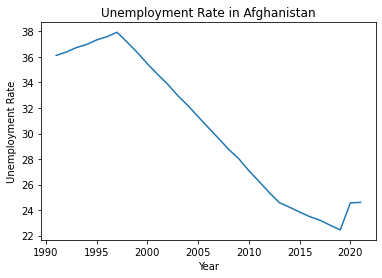

In [49]:
#Part 3:Q5 It is a predicted downward movement
lso_data = df[df['Country_Code'] == 'LSO']

# calculate the percentage change from 1991 to 2021
pct_change = (lso_data['2021'] - lso_data['1991']) / lso_data['1991'] * 100
print(pct_change)
# Extract the years and unemployment rates as separate arrays
years = list(range(1991, 2022))

# Extract the unemployment rates as a list
unemployment_rates = lso_data.iloc[0, 2:].astype(float).tolist()

# Plot the unemployment rates over the years
plt.plot(years, unemployment_rates)
# Add labels and title to the plot
plt.xlabel('Year')
plt.ylabel('Unemployment Rate')
plt.title('Unemployment Rate in Afghanistan')

# Display the plot
plt.show()


In [50]:
from sklearn.metrics import mean_absolute_percentage_error

In [51]:
#Moving average algorithm
df.set_index('Country_Code', inplace=True)

# Create a new DataFrame to store the predicted values
predicted_df = pd.DataFrame(index=df.index, columns=[2022, 2023])
df.loc[:, '2022'] = 0
# Predict the values using the Moving Average model
for country in df.index:
    predicted_df.loc[country, 2022] = df.loc[country, ['2019', '2020', '2021']].mean()
    predicted_df.loc[country, 2023] = df.loc[country, ['2020', '2021', '2022']].mean()
print(predicted_df.head())

                   2022      2023
Country_Code                     
AFE            7.526667  5.223333
AFG               12.07      8.33
AFW            6.556667  4.536667
AGO            8.093333      5.62
ALB           12.206667  8.383333


In [52]:
actual = df['2021'].values
predicted = predicted_df[2022].values
mape = mean_absolute_percentage_error(actual, predicted)
print(f"{country}: MAPE = {mape}")

ZWE: MAPE = 0.06628288908810834


In [53]:
df=df.reset_index()

In [54]:
df

,Country_Code,Country_Name,1991,1992,1993,1994,1995,1996,1997,1998,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,AFE,Africa Eastern and Southern,7.80,7.84,7.85,7.84,7.83,7.84,7.86,7.81,...,6.45,6.41,6.49,6.61,6.71,6.73,6.91,7.56,8.11,0
1,AFG,Afghanistan,10.65,10.82,10.72,10.73,11.18,10.96,10.78,10.80,...,11.19,11.14,11.13,11.16,11.18,11.15,11.22,11.71,13.28,0
2,AFW,Africa Western and Central,4.42,4.53,4.55,4.54,4.53,4.57,4.60,4.66,...,4.41,4.69,4.63,5.57,6.02,6.04,6.06,6.77,6.84,0
3,AGO,Angola,4.21,4.21,4.23,4.16,4.11,4.10,4.09,4.07,...,7.37,7.37,7.39,7.41,7.41,7.42,7.42,8.33,8.53,0
4,ALB,Albania,10.31,30.01,25.26,20.84,14.61,13.93,16.88,20.05,...,15.87,18.05,17.19,15.42,13.62,12.30,11.47,13.33,11.82,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,WSM,Samoa,2.10,2.38,2.63,3.04,3.19,3.47,3.90,4.18,...,8.67,8.72,8.50,8.31,8.58,8.69,8.41,9.15,9.84,0
231,YEM,"Yemen, Rep.",8.32,8.31,8.35,8.34,8.96,9.59,10.20,10.81,...,13.27,13.47,13.77,13.43,13.30,13.15,13.06,13.39,13.57,0
232,ZAF,South Africa,29.95,29.98,29.92,29.89,29.89,29.87,29.91,29.95,...,24.56,24.89,25.15,26.54,27.04,26.91,28.47,29.22,33.56,0
233,ZMB,Zambia,18.90,19.37,19.70,18.43,16.81,15.30,13.64,12.00,...,8.61,9.36,10.13,10.87,11.63,12.01,12.52,12.85,13.03,0


In [55]:
#ARIMA model
from statsmodels.tsa.arima.model import ARIMA
for country in df['Country_Name'].unique():
    # Select data for the current country
    country_data = df[df['Country_Name'] == country]
    
    # Create a new dataframe to store the predictions
    predictions = pd.DataFrame(columns=['Year', 'Value'])
    model = ARIMA(country_data.iloc[:, 2:].values.reshape(-1), order=(1, 1, 1))
    model_fit = model.fit()
    
    forecast = model_fit.forecast(2)
    
    for i in range(2):
        year = 2022 + i
        value = forecast[i]
        predictions = predictions.append({'Year': year, 'Value': value}, ignore_index=True)
        
    
        
        
    

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [56]:
df_newp = pd.concat([df,predicted_df], axis=1)

<AxesSubplot:>

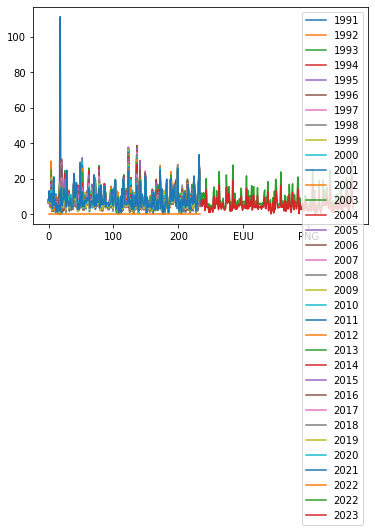

In [57]:
#Line graph showing all the year +the predicted years
df_newp.plot.line()

In [58]:
def maxmin(country):

    # select row for the specified country
    row_data = predicted_df.loc[country].iloc[:]
    row_min = row_data.min()
    row_max = row_data.max()
    print(row_min,row_max)

In [59]:
#Printing the minimum and maximum values for each country
maxmin('AFE')

5.223333333333333 7.526666666666666


In [60]:
predictd_df = predicted_df.reset_index()

In [61]:
#2022 has overall higher unemployment
predicted_df.sum(axis = 0)

2022    1847.556667
2023        1292.38
dtype: object

In [62]:
df = df.drop(['2022'], axis=1)

In [63]:
df

,Country_Code,Country_Name,1991,1992,1993,1994,1995,1996,1997,1998,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,AFE,Africa Eastern and Southern,7.80,7.84,7.85,7.84,7.83,7.84,7.86,7.81,...,6.56,6.45,6.41,6.49,6.61,6.71,6.73,6.91,7.56,8.11
1,AFG,Afghanistan,10.65,10.82,10.72,10.73,11.18,10.96,10.78,10.80,...,11.34,11.19,11.14,11.13,11.16,11.18,11.15,11.22,11.71,13.28
2,AFW,Africa Western and Central,4.42,4.53,4.55,4.54,4.53,4.57,4.60,4.66,...,4.64,4.41,4.69,4.63,5.57,6.02,6.04,6.06,6.77,6.84
3,AGO,Angola,4.21,4.21,4.23,4.16,4.11,4.10,4.09,4.07,...,7.35,7.37,7.37,7.39,7.41,7.41,7.42,7.42,8.33,8.53
4,ALB,Albania,10.31,30.01,25.26,20.84,14.61,13.93,16.88,20.05,...,13.38,15.87,18.05,17.19,15.42,13.62,12.30,11.47,13.33,11.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,WSM,Samoa,2.10,2.38,2.63,3.04,3.19,3.47,3.90,4.18,...,8.75,8.67,8.72,8.50,8.31,8.58,8.69,8.41,9.15,9.84
231,YEM,"Yemen, Rep.",8.32,8.31,8.35,8.34,8.96,9.59,10.20,10.81,...,13.17,13.27,13.47,13.77,13.43,13.30,13.15,13.06,13.39,13.57
232,ZAF,South Africa,29.95,29.98,29.92,29.89,29.89,29.87,29.91,29.95,...,24.73,24.56,24.89,25.15,26.54,27.04,26.91,28.47,29.22,33.56
233,ZMB,Zambia,18.90,19.37,19.70,18.43,16.81,15.30,13.64,12.00,...,7.85,8.61,9.36,10.13,10.87,11.63,12.01,12.52,12.85,13.03


In [64]:
top_10_unemployment_2021 = df.sort_values(by='2021', ascending=False).head(10)
top_10_unemployment_2021

,Country_Code,Country_Name,1991,1992,1993,1994,1995,1996,1997,1998,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
232,ZAF,South Africa,29.95,29.98,29.92,29.89,29.89,29.87,29.91,29.95,...,24.73,24.56,24.89,25.15,26.54,27.04,26.91,28.47,29.22,33.56
49,DJI,Djibouti,29.36,29.20,29.19,29.02,28.94,28.84,28.70,28.58,...,26.78,26.64,26.48,26.33,26.19,26.06,26.19,26.36,28.39,28.39
199,SWZ,Eswatini,21.81,21.76,21.73,21.71,21.65,22.08,22.50,23.08,...,25.15,24.55,23.97,23.33,22.72,22.75,22.79,22.84,25.51,25.76
172,PSE,West Bank and Gaza,11.60,11.31,11.29,11.15,11.10,11.03,10.83,10.72,...,19.20,19.89,20.53,23.00,23.94,25.68,26.26,25.34,25.89,24.90
28,BWA,Botswana,13.82,16.30,18.76,21.20,21.37,21.59,21.17,20.86,...,18.95,19.40,19.99,20.57,21.03,21.57,22.07,22.61,24.93,24.72
123,LSO,Lesotho,36.12,36.39,36.74,36.98,37.34,37.59,37.94,37.16,...,25.37,24.58,24.22,23.84,23.48,23.20,22.81,22.44,24.56,24.60
39,COG,"Congo, Rep.",20.07,20.05,20.07,20.09,20.00,19.98,20.01,19.96,...,20.18,20.32,20.31,20.45,20.56,20.56,20.61,20.62,22.84,23.01
70,GAB,Gabon,17.78,17.87,17.78,17.72,17.63,17.58,17.48,17.43,...,20.49,20.52,20.57,20.61,20.67,20.72,20.75,20.74,21.97,22.26
149,NAM,Namibia,19.14,19.21,19.38,19.40,21.06,22.77,24.45,23.08,...,16.77,19.03,18.52,20.91,23.35,21.64,19.88,19.99,21.45,21.68
224,VCT,St. Vincent and the Grenadines,19.77,19.69,19.74,20.19,19.99,20.38,20.44,20.57,...,18.97,18.99,19.05,19.09,19.11,19.18,19.18,19.28,21.00,21.62


<AxesSubplot:>

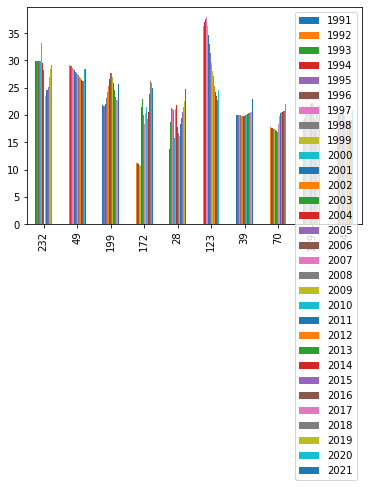

In [65]:
top_10_unemployment_2021.plot.bar()

<AxesSubplot:xlabel='Country_Code'>

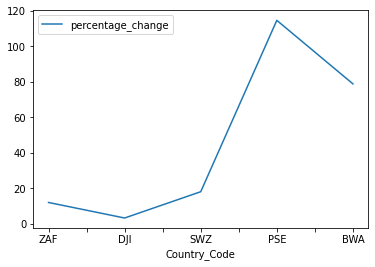

In [66]:
#line graph showing year on year percentage change 
top_5_unemployment_2021.plot.line('Country_Code','percentage_change')


In [67]:
df_newp = df_newp.reset_index()

In [68]:
top_3_unemployment_2021 = df_newp.sort_values(by='2021', ascending=False).head(3)

<AxesSubplot:>

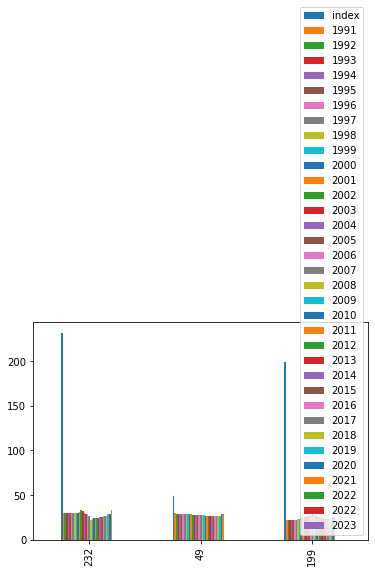

In [69]:
#A bar graph with top 3 countries in unemployment in 2021 along with their forecast in 2022 and 2023
top_3_unemployment_2021.plot.bar()

<AxesSubplot:>

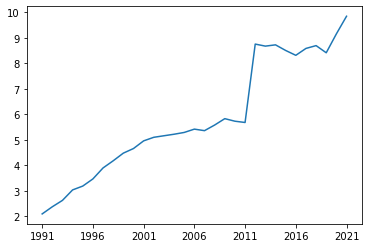

In [70]:
df_new = df_new.set_index('Country_Code')
country = 'WSM'
df_new.loc[country].iloc[1:].plot(kind='line')

the conclusions derived from the graphs above:
1. For the country WSM - The unemployment number has increased in a somewhat linear way

#Part 6:
The last project that I worked on was Stock Market prediction system using LSTM. I imported the infosys stock market data for the year 2015. I preprocessed the data using pandas and removes all the null values and outliers. I used the feature [open, high,low and volume] to predict the closing value. I divided the data into train and test set. Since it was a time series data some preprocessing was required to feed it tinto the LSTM model.I used sklearn for it. I plotted the original dataset and the predicted values to check the accuracy.
https://github.com/trupti79916/Stock-Market-Prediction-System.git

#Part 7:
Since I am in my 3rd year of engineering. Getting a job full time would not be possible at the moment. If possible, I would like to get this internship part-time. I have college until 2 everyday and after that I am completely free. Hence, a time after 2 wiukd be suitable for me